In [1]:
from google.colab import files

uploaded = files.upload()

import pandas as pd

df = pd.read_csv(next(iter(uploaded)), encoding='latin1')

# Print the DataFrame
print(df)
print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
df.head()

Saving DataMineria.csv to DataMineria.csv
     ï»¿FECHA_CORTE  PERIODO_REGISTRO  FECHA_ACCIDENTE  \
0          20230511            202304         20230416   
1          20230511            202304         20230420   
2          20230511            202304         20230426   
3          20230511            202304         20230424   
4          20230511            202304         20230422   
..              ...               ...              ...   
736        20230511            202206         20220603   
737        20230511            202206         20220525   
738        20230511            202206         20220324   
739        20230511            202206         20220406   
740        20230511            202206         20220523   

                                        TIPO_ACCIDENTE  \
0                                  CAÃDAS DE PERSONAS   
1                                   CAÃDAS DE OBJETOS   
2    OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...   
3             ESFUERZOS EXCES

,ï»¿FECHA_CORTE,PERIODO_REGISTRO,FECHA_ACCIDENTE,TIPO_ACCIDENTE,SUB_GRUPO_TIPO_ACCIDENTE,AGENTE_CAUSANTE,SUB_GRUPO_AGENTE_CAUSANTE_1,PARTE_AFECTADA,NATURALEZA_LESION,DEPARTAMENTO,...,ESTADO_CIVIL,CATEGORIA_OCUPACIONAL,TIPO_CONTRATO,GRADO_INSTRUCCION,AREA_TRABAJO,EDAD,TURNO_TRABAJO,GRAVEDAD_ACCIDENTE,DIAS_DESCANSO,MONTO_DESCANSO
0,20230511,202304,20230416,CAÃDAS DE PERSONAS,CAÃDAS DE PERSONAS QUE OCURREN A DISTINTO NIV...,MEDIOS DE TRANSPORTE Y DE MANUTENCIÃN,"MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÃN DE...","CABEZA, UBICACIONES MÃLTIPLES",CONTUSIONES,ICA,...,SOLTERO/A,OTROS,PLAZO FIJO,EDUCACIÃN SECUNDARIA COMPLETA,PLANTA CONCENTRADORA,32,DÃA,ACCIDENTE INCAPACITANTE,8,907.33
1,20230511,202304,20230420,CAÃDAS DE OBJETOS,OTRAS CAÃDAS DE OBJETOS,OTROS APARATOS,OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÃ...,PIE (CON EXCEPCIÃN DE LOS DEDOS),CONTUSIONES,JUNIN,...,NO DETERMINADO,OTROS,INDETERMINADO,"EDUCACIÃN SUPERIOR (INSTITUTO SUPERIOR, ETC) ...",PERFORISTA,38,DÃA,ACCIDENTE INCAPACITANTE,30,3045.46
2,20230511,202304,20230426,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,"HOMBRO (INCLUSIÃN DE CLAVÃCULAS, OMOPLATO Y ...",CONTUSIONES,LIMA,...,NO DETERMINADO,OPERARIO,INDETERMINADO,EDUCACIÃN SECUNDARIA COMPLETA,PLANTA,43,DÃA,ACCIDENTE INCAPACITANTE,3,226.38
3,20230511,202304,20230424,ESFUERZOS EXCESIVOS O FALSOS MOVIMIENTOS,FALSOS MOVIMIENTOS,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,RODILLA,CONTUSIONES,LIMA,...,SOLTERO/A,EMPLEADO,PLAZO FIJO,"EDUCACIÃN SUPERIOR (INSTITUTO SUPERIOR, ETC) ...",MAQUINARIA PESADA,40,TARDE,ACCIDENTE INCAPACITANTE,2,610.07
4,20230511,202304,20230422,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,NARIZ Y SENOS PARANASALES,FRACTURAS,AREQUIPA,...,SOLTERO/A,OTROS,MODALIDADES FORMATIVAS,EDUCACIÃN SECUNDARIA COMPLETA,OTROS,24,NOCHE,ACCIDENTE INCAPACITANTE,2,139.72


1. Carga de librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import warnings

# Configuraciones iniciales
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

print("INICIANDO PROCESO DE MACHINE LEARNING EXPERTO...\n")

INICIANDO PROCESO DE MACHINE LEARNING EXPERTO...



# ------------------------------------------------------------------------
# ACTIVIDAD 1: CARGA Y LIMPIEZA DE DATOS (DATA PREPARATION)
# Objetivo: Eliminar ruido y asegurar calidad del dato para el modelo.
# ------------------------------------------------------------------------

In [10]:
print("--- [1] CARGA Y LIMPIEZA ---")
# 1.1 Eliminar filas vacías
df_clean = df.dropna(how='all').copy()

# 1.2 Convertir variable objetivo (Target) a numérico
df_clean['MONTO_DESCANSO'] = pd.to_numeric(df_clean['MONTO_DESCANSO'], errors='coerce')

# 1.3 Filtrado de calidad: Eliminar registros sin monto o con monto 0/negativo
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['MONTO_DESCANSO'])
df_clean = df_clean[df_clean['MONTO_DESCANSO'] > 0]
final_rows = len(df_clean)

print(f"Registros iniciales: {initial_rows}")
print(f"Registros válidos para entrenamiento: {final_rows}")
print(f"Registros eliminados (ruido/nulos): {initial_rows - final_rows}")

--- [1] CARGA Y LIMPIEZA ---
Registros iniciales: 741
Registros válidos para entrenamiento: 741
Registros eliminados (ruido/nulos): 0


# -------------------------------------------------------------------------
# ACTIVIDAD 2: SELECCIÓN DE CARACTERÍSTICAS (FEATURE SELECTION)
# Objetivo: Seleccionar la mayor cantidad de variables relevantes disponibles
# al momento del accidente, excluyendo aquellas que causarían 'data leakage'
# (como DIAS_DESCANSO, ya que si sabemos los días, el costo es obvio).
# -------------------------------------------------------------------------

In [11]:
print("\n--- [2] SELECCIÓN DE VARIABLES ---")

features = [
    # --- Variables del Accidente ---
    'TIPO_ACCIDENTE',
    #'SUB_GRUPO_TIPO_ACCIDENTE',
    'AGENTE_CAUSANTE',
    'PARTE_AFECTADA',
    #'NATURALEZA_LESION',
    'GRAVEDAD_ACCIDENTE',

    # --- Variables del Trabajador ---
    'SEXO_TRABAJADOR',
    'EDAD',
    #'ESTADO_CIVIL',
    #'CATEGORIA_OCUPACIONAL',
    #'TIPO_CONTRATO',
    #'GRADO_INSTRUCCION',
    'ACTIVIDAD_ECONOMICA',
    #'TURNO_TRABAJO',

    # --- Contexto ---
    'DEPARTAMENTO'
]
target = 'MONTO_DESCANSO'

print(f"Total variables predictoras seleccionadas: {len(features)}")
print(f"Lista: {features}")

X = df_clean[features]
y = df_clean[target]

# Limpieza específica de variable EDAD
X['EDAD'] = pd.to_numeric(X['EDAD'], errors='coerce')
X['EDAD'] = X['EDAD'].fillna(X['EDAD'].median()) # Imputación por mediana


--- [2] SELECCIÓN DE VARIABLES ---
Total variables predictoras seleccionadas: 8
Lista: ['TIPO_ACCIDENTE', 'AGENTE_CAUSANTE', 'PARTE_AFECTADA', 'GRAVEDAD_ACCIDENTE', 'SEXO_TRABAJADOR', 'EDAD', 'ACTIVIDAD_ECONOMICA', 'DEPARTAMENTO']


# -------------------------------------------------------------------------
# ACTIVIDAD 3: PREPROCESAMIENTO AVANZADO
# Objetivo: Transformar texto a números (Encoding) y escalar valores.
# -------------------------------------------------------------------------

In [12]:
print("\n--- [3] PREPROCESAMIENTO ---")

# División de columnas por tipo
numeric_features = ['EDAD']
categorical_features = [col for col in features if col not in numeric_features]

# Pipeline Numérico: Imputación + Escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline Categórico: Imputación + OneHotEncoding (Manejo de nuevas categorías)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NO_REGISTRADO')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Unificador (ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# División Train/Test (80% Entrenamiento, 20% Prueba) según lineamientos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


--- [3] PREPROCESAMIENTO ---


## -------------------------------------------------------------------------
# ACTIVIDAD 4: MODELADO Y EVALUACIÓN (SELECCIÓN DEL MEJOR MODELO)
# Objetivo: Comparar Random Forest vs Gradient Boosting.
# -------------------------------------------------------------------------

In [13]:
print("\n--- [4] ENTRENAMIENTO Y COMPARACIÓN ---")

modelos = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

resultados = []

print(f"{'Modelo':<20} | {'MAE':<10} | {'R2 Score':<10}")
print("-" * 45)

for nombre, modelo in modelos.items():
    print(f"Entrenando modelo: {nombre}...")

    # Crear Pipeline completo (Preproceso + Modelo)
    pipeline_modelo = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('modelo', modelo)])

    # Entrenar
    pipeline_modelo.fit(X_train, y_train)

    # Predecir sobre datos no vistos (Test)
    y_pred = pipeline_modelo.predict(X_test)

    # Calcular Métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    #resultados[nombre] = {'MAE': mae, 'Pipeline': pipeline_modelo}
    #print(f"   > MAE (Error Promedio en Soles): {mae:.2f}")

    resultados.append({
        "Modelo": nombre,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })
    print(f"{nombre:<20} | {mae:<10.2f} | {r2:<10.4f}")

# Selección del ganador
#mejor_modelo_nombre = min(resultados, key=lambda k: resultados[k]['MAE'])
#mejor_pipeline = resultados[mejor_modelo_nombre]['Pipeline']

#print(f"\n>>> MODELO GANADOR: {mejor_modelo_nombre}")
#print("Este modelo ha demostrado ser técnicamente superior al minimizar el error absoluto medio.")

# Convertir a DataFrame para fácil manipulación visual
df_resultados = pd.DataFrame(resultados).sort_values(by="MAE")
print("\n=== RESULTADOS ORDENADOS POR MAE (Menor es mejor) ===")
df_resultados


--- [4] ENTRENAMIENTO Y COMPARACIÓN ---
Modelo               | MAE        | R2 Score  
---------------------------------------------
Entrenando modelo: Regresión Lineal...
Regresión Lineal     | 1026.75    | 0.0378    
Entrenando modelo: Árbol de Decisión...
Árbol de Decisión    | 1246.54    | -0.5620   
Entrenando modelo: Random Forest...
Random Forest        | 996.63     | 0.0495    
Entrenando modelo: Gradient Boosting...
Gradient Boosting    | 995.10     | 0.0538    

=== RESULTADOS ORDENADOS POR MAE (Menor es mejor) ===


,Modelo,MAE,RMSE,R2
3,Gradient Boosting,995.101530,1652.093303,0.053835
2,Random Forest,996.632589,1655.851397,0.049526
0,Regresión Lineal,1026.745014,1666.060810,0.037769
1,Árbol de Decisión,1246.542215,2122.695432,-0.561971


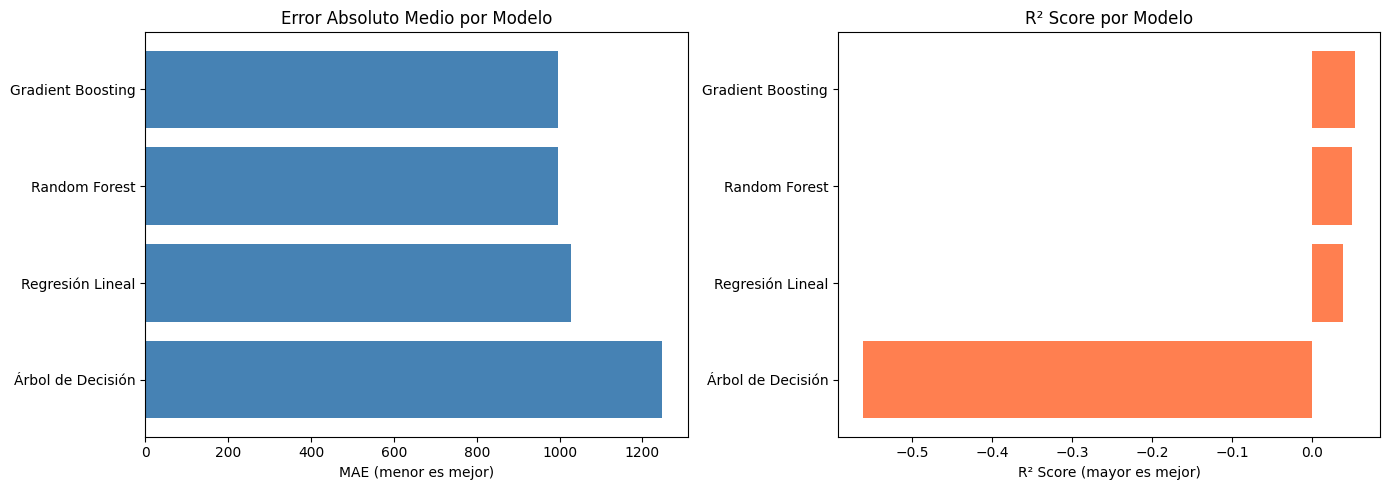

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de MAE
axes[0].barh(df_resultados['Modelo'], df_resultados['MAE'], color='steelblue')
axes[0].set_xlabel('MAE (menor es mejor)')
axes[0].set_title('Error Absoluto Medio por Modelo')
axes[0].invert_yaxis()

# Gráfico de R2
axes[1].barh(df_resultados['Modelo'], df_resultados['R2'], color='coral')
axes[1].set_xlabel('R² Score (mayor es mejor)')
axes[1].set_title('R² Score por Modelo')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# ACTIVIDAD 5: PREDICCIÓN FINAL (DEMOSTRACIÓN)
# -------------------------------------------------------------------------

In [23]:
print("\n--- [5] DEMOSTRACIÓN DE PREDICCIÓN ---")

# Tomamos un caso real del set de prueba
caso_real = X_test.iloc[0:1]
valor_real = y_test.iloc[0]

# Identificar el mejor modelo de df_resultados (el primero después de ordenar por MAE)
best_model_name = df_resultados.iloc[0]['Modelo']

# Recuperar la instancia del modelo no entrenado
best_model_instance = modelos[best_model_name]

print(best_model_instance)
# Reconstruir y entrenar el pipeline completo para el mejor modelo
# `preprocessor` es global y fue definido en una celda anterior (BKXwqdSybyCZ)
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('modelo', best_model_instance)])

best_pipeline.fit(X_train, y_train)

# Realizar la predicción utilizando el pipeline del mejor modelo
prediccion = best_pipeline.predict(caso_real)[0]

print("Características del Caso:")
print(caso_real.iloc[0].to_dict())
print(f"\nCosto Real del Descanso:     S/. {valor_real:.2f}")
print(f"Costo Predicho por el Modelo: S/. {prediccion:.2f}")
print(f"Margen de Error:              S/. {abs(valor_real - prediccion):.2f}")


--- [5] DEMOSTRACIÓN DE PREDICCIÓN ---
GradientBoostingRegressor(random_state=42)
Características del Caso:
{'TIPO_ACCIDENTE': 'PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OBJETOS, A EXCEPCIÃ\x93N DE CAÃ\x8dDAS DE OBJETOS', 'AGENTE_CAUSANTE': 'AMBIENTE DEL TRABAJO', 'PARTE_AFECTADA': 'TOBILLO', 'GRAVEDAD_ACCIDENTE': 'ACCIDENTE INCAPACITANTE', 'SEXO_TRABAJADOR': 'MASCULINO', 'EDAD': 47, 'ACTIVIDAD_ECONOMICA': 'EXPLOTACIÃ\x93N DE MINAS Y CANTERAS', 'DEPARTAMENTO': 'ANCASH'}

Costo Real del Descanso:     S/. 561.77
Costo Predicho por el Modelo: S/. 842.67
Margen de Error:              S/. 280.90
